In [1]:
import pickle as pkl
import matplotlib.pyplot as plt

In [500]:
can_data = pkl.load(open('data/fakhir-uturn.pkl', 'rb'))


can_data = can_data[2:]

In [501]:
# https://docs.openvehicles.com/en/latest/components/vehicle_dbc/docs/dbc-primer.html
# this is goated

In [502]:
speed = []
steering = []
brake = []
gas = []

In [503]:
for can_signal in can_data:
    can_signal = can_signal.decode('utf-8').split()
    if len(can_signal) < 3:
        continue
    can_id = int(can_signal[0], 16)
    can_length = int(can_signal[1])
    can_frame = can_signal[2:] # to remove id and length
    new_can_frame = ''
    for byte in can_frame:
        if len(byte) == 1:
            byte = '0' + byte
        new_can_frame += byte
    can_frame = [new_can_frame[i:i+2] for i in range(0, len(new_can_frame), 2)]
    
    if can_id == 180: # SPEED
        bit_start = 47
        bit_start = ((bit_start // 8)*8) + (7 - (bit_start % 8))
        length = 16
        scale = 0.01
        bin_str = bin(int(''.join(can_frame), 16))[2:].zfill(64)
        bin_data = bin_str[bit_start:bit_start + length]
        value = int(bin_data, 2) * scale
        speed.append(value)
    if can_id == 37: # STEERING ANGLE
        signed = True
        bit_start = 2
        bit_start = ((bit_start // 8)*8) + (7 - (bit_start % 8))
        length = 11
        scale = 1
        bin_str = bin(int(''.join(can_frame), 16))[2:].zfill(64)
        bin_data = bin_str[bit_start:bit_start + length]
        value = int(bin_data, 2)
        if value >= 2**(length-1) and signed:
            value -= 2**length
        value = value * scale
        steering.append(value)
    if can_id == 548: # BRAKE PRESSURE
        signed = False
        bit_start = 39
        length = 16
        scale = 1
        
        bit_start = ((bit_start // 8)*8) + (7 - (bit_start % 8))
        bin_str = bin(int(''.join(can_frame), 16))[2:].zfill(64)
        bin_data = bin_str[bit_start:bit_start + length]
        value = int(bin_data, 2)
        if value >= 2**(length-1) and signed:
            value -= 2**length
        value = value * scale
        brake.append(value)
    if can_id == 705: # GAS PEDAL PRESSURE
        signed = False
        bit_start = 55
        length = 8
        scale = 1
        
        bit_start = ((bit_start // 8)*8) + (7 - (bit_start % 8))
        bin_str = bin(int(''.join(can_frame), 16))[2:].zfill(64)
        bin_data = bin_str[bit_start:bit_start + length]
        value = int(bin_data, 2)
        if value >= 2**(length-1) and signed:
            value -= 2**length
        value = value * scale
        gas.append(value)

In [504]:
import matplotlib.pyplot as plt

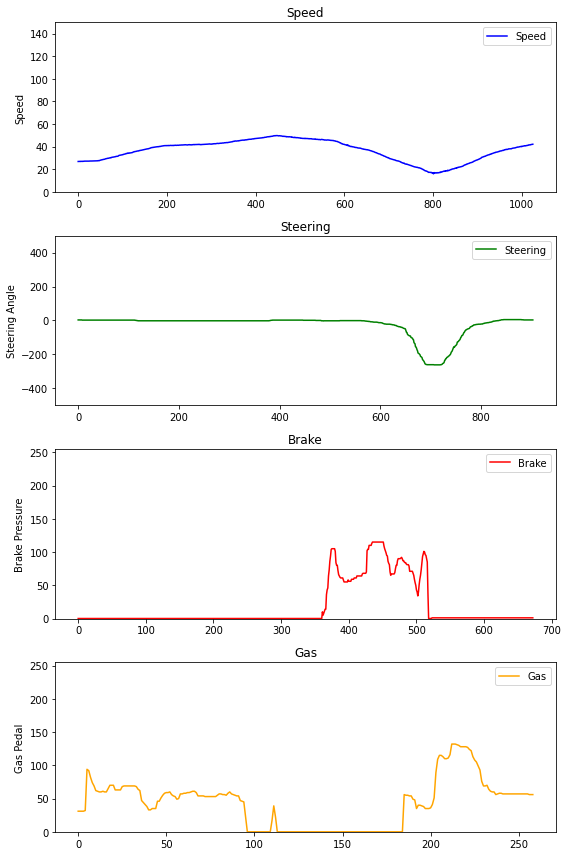

In [505]:

# Create a figure and a set of subplots
fig, axs = plt.subplots(4, 1, figsize=(8, 12))  # 4 rows, 1 column

# Plot each list in a separate subplot
axs[0].plot(speed, label='Speed', color='blue')
axs[0].set_title('Speed')
axs[0].set_ylabel('Speed')
axs[0].set_ylim(0, 150)
axs[0].legend()

axs[1].plot(steering, label='Steering', color='green')
axs[1].set_title('Steering')
axs[1].set_ylabel('Steering Angle')
axs[1].set_ylim(-500, 500)  # Set y-axis limits for the steering plot
axs[1].legend()

axs[2].plot(brake, label='Brake', color='red')
axs[2].set_title('Brake')
axs[2].set_ylabel('Brake Pressure')
axs[2].set_ylim(0, 255)
axs[2].legend()

axs[3].plot(gas, label='Gas', color='orange')
axs[3].set_title('Gas')
axs[3].set_ylabel('Gas Pedal')
axs[3].set_ylim(0, 255)
axs[3].legend()

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()